In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb

# Only keep the top 10,000 most frequent words
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (25000,)
Testing Data Shape: (25000,)


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences so that all have the same length
maxlen = 200  # maximum review length

X_train_padded = pad_sequences(X_train, maxlen=maxlen)
X_test_padded = pad_sequences(X_test, maxlen=maxlen)

In [4]:
# Build the model
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6852 - loss: 0.5429 - val_accuracy: 0.8340 - val_loss: 0.3672
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9563 - loss: 0.1322 - val_accuracy: 0.8574 - val_loss: 0.3775
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9953 - loss: 0.0201 - val_accuracy: 0.8498 - val_loss: 0.5541
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9985 - loss: 0.0056 - val_accuracy: 0.8464 - val_loss: 0.5922
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 1.0000 - loss: 9.2335e-04 - val_accuracy: 0.8498 - val_loss: 0.6132
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 1.0000 - loss: 1.7957e-04 - val_accuracy: 0.8524 - val_loss: 0.6322
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 1.0000 - loss: 1.0947e-04 - val_accuracy: 0.8524 - val_loss: 0.6528
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 

In [6]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=2)

print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


782/782 - 3s - 3ms/step - accuracy: 0.8496 - loss: 0.7407
Test Loss: 0.74
Test Accuracy: 0.85


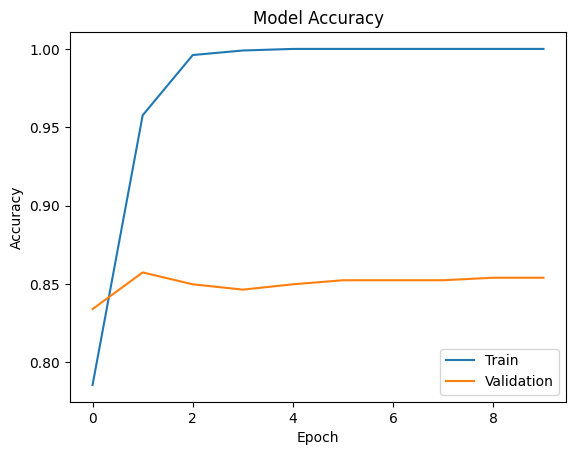

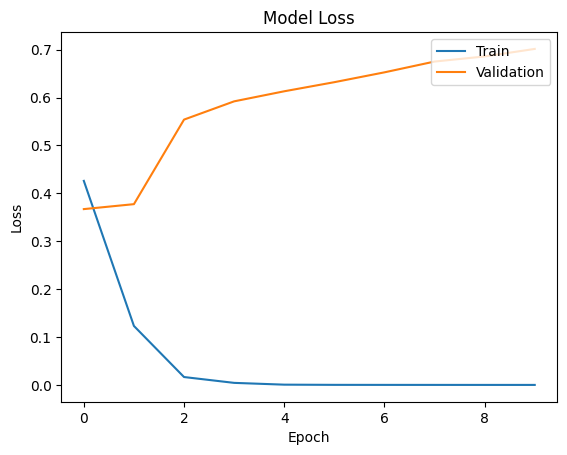

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
# Predict first 5 reviews
predictions = model.predict(X_test_padded[:5])

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Review {i+1}: Predicted Sentiment: {'Positive' if pred[0] > 0.5 else 'Negative'} | Actual Sentiment: {'Positive' if y_test[i]==1 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Review 1: Predicted Sentiment: Negative | Actual Sentiment: Negative
Review 2: Predicted Sentiment: Positive | Actual Sentiment: Positive
Review 3: Predicted Sentiment: Positive | Actual Sentiment: Positive
Review 4: Predicted Sentiment: Negative | Actual Sentiment: Negative
Review 5: Predicted Sentiment: Positive | Actual Sentiment: Positive
